In [ ]:
# 📊 Analyzing Food Delivery Profitability Project


In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "food_orders_new_delhi (1).csv"  # Replace with your actual path if needed
df = pd.read_csv(file_path)

# Step 1: Basic Info
print("Initial Data Overview:")
print(df.info())
print(df.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None
   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270  

In [3]:
# Step 2: Clean & Convert Date Columns
df["Order Date and Time"] = pd.to_datetime(df["Order Date and Time"])
df["Delivery Date and Time"] = pd.to_datetime(df["Delivery Date and Time"])

In [4]:
# Step 3: Handle Discounts & Extract Numeric Value
def extract_discount(value, order_value):
    if pd.isna(value) or value.lower() == 'none':
        return 0
    value = value.strip().lower()
    percent_match = re.search(r'(\d+)%', value)
    if percent_match:
        return round((int(percent_match.group(1)) / 100) * order_value)
    flat_match = re.search(r'(\d+)', value)
    if flat_match:
        return int(flat_match.group(1))
    return 0

df["Estimated Discount"] = df.apply(lambda row: extract_discount(row["Discounts and Offers"], row["Order Value"]), axis=1)

In [5]:
# Step 4: Profit Calculation
df["Profit"] = df["Order Value"] + df["Delivery Fee"] - (
    df["Commission Fee"] + df["Payment Processing Fee"] + df["Refunds/Chargebacks"] + df["Estimated Discount"]
)

In [6]:
# Step 5: Profitability Summary
total_orders = len(df)
total_revenue = df["Order Value"].sum()
total_profit = df["Profit"].sum()
average_profit = df["Profit"].mean()
most_profit = df["Profit"].max()
least_profit = df["Profit"].min()

print("\n=== Profitability Summary ===")
print(f"Total Orders: {total_orders}")
print(f"Total Revenue: ₹{total_revenue}")
print(f"Total Profit: ₹{total_profit}")
print(f"Average Profit per Order: ₹{average_profit:.2f}")
print(f"Most Profitable Order: ₹{most_profit}")
print(f"Least Profitable Order: ₹{least_profit}")


=== Profitability Summary ===
Total Orders: 1000
Total Revenue: ₹1053969
Total Profit: ₹823167
Average Profit per Order: ₹823.17
Most Profitable Order: ₹1926
Least Profitable Order: ₹-198


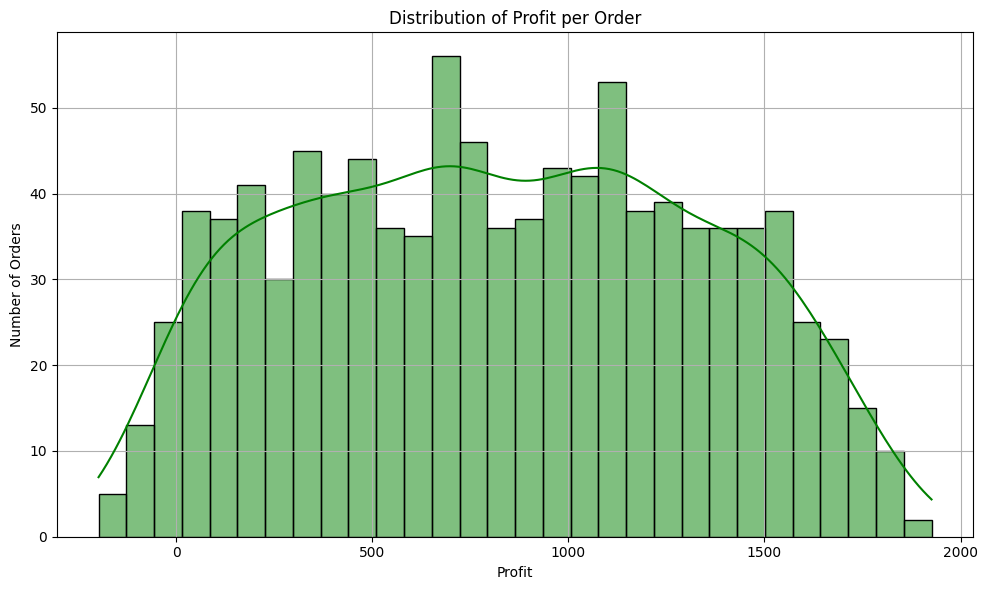

In [7]:
# Step 6: Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df["Profit"], bins=30, kde=True, color="green")
plt.title("Distribution of Profit per Order")
plt.xlabel("Profit")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

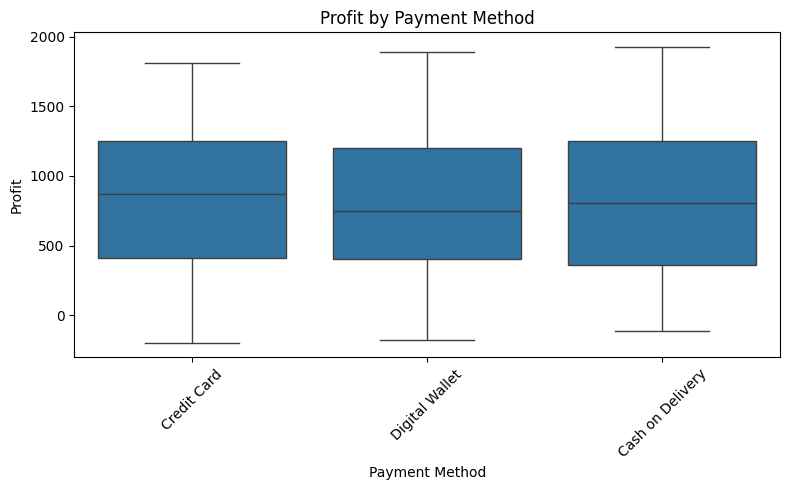

In [8]:
# Optional: Profit by Payment Method
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Payment Method", y="Profit")
plt.title("Profit by Payment Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Step 7: Export Cleaned Data with Profit
df.to_csv("cleaned_food_orders_with_profit.csv", index=False)
print("\nCleaned data with profit saved as 'cleaned_food_orders_with_profit.csv'")


Cleaned data with profit saved as 'cleaned_food_orders_with_profit.csv'


In [ ]:
Total Profit: ₹8,23,167